# Google Predictive Analysis Executive Report

### Problem Statement
>**Google Analytics Customer Revenue Prediction**

>**Predict how much GStore customers will spend**

Proposed Methods and Models
>Since we are working with a `continuous` hence, `regression` model and our data set contains a `label`, I will be trying out different `supervised` models to find out which one is best and I would us `Root Mean Square Error` metric to check how well our model is doing. With this metric, the closer we are to `zero` for both our testing and training data, the better are model is doing.  To ensure that our data was equally scaled, a `Standard Scalar` scaling was applied at all times.

### Risks & assumptions of your data
    Risks involved will be minimal. some of which includes having sufficient time to try out all of the intended models and also have insufficient memory to run some of the models

Also this might be too aggressive given the nature/complexity of the dataset.

**Revise initial goals & success criteria, as needed**

My goals remain the same as the criteria have been layout by kaggle competition. However, I may want to predict whether a site visit led to a transaction and if yes, go ahead to predict amount customers will spend per transaction.

### Data Source
Data - Given on Kaggle. Data-size for training = 1,468,195 KB; Data-size for test = 1,315,279 KB; Data format = .csv; 

There are some json scripts in the dataset

### Examining Data Set

In [1]:
import pandas as pd

import numpy as np


df = pd.read_csv("../capstone_data/kaggle_data/train.csv")

C:\Users\install\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
channelGrouping         903653 non-null object
date                    903653 non-null int64
device                  903653 non-null object
fullVisitorId           903653 non-null object
geoNetwork              903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
totals                  903653 non-null object
trafficSource           903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


### Exploratory Data Analysis

**Dropped Columns** 
I looked at each column closely and columns that had consistently the same value for each observation or didn't seem to place much relevance or had the same data present in another column were dropped. Such columns include:

['browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel',
       'mobileInputSelector', 'operatingSystemVersion',
       'screenColors', 'screenResolution', 'visits','adwordsClickInfo', 'campaignCode','socialEngagementType','networkLocation', 'longitude', 'latitude', 'cityId', 'metro', 'country', 'region', 'subContinent', 'isMobile', 'medium'] 

Filled all `Nan's` with `-999` for categorical variables and numerical variables with `0`. This was done because I did not want the categorical columns affected much when we get dummies on them turning them to `1s` and `0s`. Also the missing values in the numerical columns example `transactionRevenue` might hold the same relevance as the value 0, because in both cases we might say no transaction or actual sale was made when customer visited the site. We could say that the customer left the site without checking through the merchandise in the store or did not get to the store page.

For each column that has a json script imbeded, I transform them into a data frame. For example `df['totals']`. Once the column has been turned into a data frame. some more EDA is done by deleting columns that would play any effect on our model either because its the same for all rows or completely empty or has no value.
After EDA, this column is added to the main data frame while the previous json column is dropped to avoid any duplicates.
The `total` column is illustrated below.

> Within the totals column is transactionRevenue, our y-label. This is what will be used to train our model and predict transactionRevenue for our kaggle test data.

In [4]:
df['totals'].head()

0    {"visits": "1", "hits": "1", "pageviews": "1",...
1    {"visits": "1", "hits": "1", "pageviews": "1",...
2    {"visits": "1", "hits": "1", "pageviews": "1",...
3    {"visits": "1", "hits": "1", "pageviews": "1",...
4    {"visits": "1", "hits": "1", "pageviews": "1",...
Name: totals, dtype: object

In [5]:
import json
# This is my y-label for this data set. What I will be predicting.

In [6]:
totals = pd.DataFrame([json.loads(each) for each in df['totals']])
totals.head()

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1,1,1,1,NaN,1
1,1,1,1,1,NaN,1
2,1,1,1,1,NaN,1
3,1,1,1,1,NaN,1
4,1,1,NaN,1,NaN,1


In [7]:
totals.info()

# They are all numerical values.
totals.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 6 columns):
bounces               450630 non-null object
hits                  903653 non-null object
newVisits             703060 non-null object
pageviews             903553 non-null object
transactionRevenue    11515 non-null object
visits                903653 non-null object
dtypes: object(6)
memory usage: 41.4+ MB


,bounces,hits,newVisits,pageviews,transactionRevenue,visits
count,450630,903653,703060,903553,11515,903653
unique,1,274,1,213,5332,1
top,1,1,1,1,16990000,1
freq,450630,446754,703060,452522,256,903653


The least amount spent are shown below starting with `$0.01`

In [8]:
min_total_transactionRevenue = totals[totals['transactionRevenue'].notnull()]['transactionRevenue'].map(lambda x: int(x)/1000000).sort_values()
min_total_transactionRevenue.head()

468262    0.01
181497    0.04
396053    0.09
762377    0.16
181509    0.20
Name: transactionRevenue, dtype: float64

In [9]:
totals.isnull().sum()

# Fill all Nan's in total df with seems it seems no value was 0
totals = totals.fillna(0)

In [10]:
totals.columns

Index(['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue',
       'visits'],
      dtype='object')

In [11]:
# As shown above, all the totals column are object type. Casting them to int since their values are numbers. 
totals['bounces'] = totals.bounces.astype('int')
totals['hits'] = totals['hits'].astype('int')
totals['newVisits'] = totals['newVisits'].astype('int')
totals['pageviews'] = totals['pageviews'].astype('int')

The `visits` column was dropped because it contained the same value  of `1` for every observation which will have no effect on our model

In [12]:
totals = totals.drop('visits', axis=1)

In [13]:
totals['transactionRevenue'].shape

(903653,)

From `info()` we now we have 903653 observations (rows) in our data set. `Describe()` method informs us that only `11515` of that actually is not null in the `transactionRevenue` column. Of these values, the non-zero values are rounded to the 1,000,000 unit, hence, we have to divide by 1,000,000 to get our values to 1unit values that we can relate with adequately. Dividing the transactionRevenue column by number transforms the column from and object to a number stored as float.

In [14]:
totals['transactionRevenue'] = totals['transactionRevenue'].map(lambda x: float(x)/1000000)
totals["transactionRevenue"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: transactionRevenue, dtype: float64

**The maximum amount spent is `$23,129.50`**

In [15]:
max_total_transactionRevenue = totals['transactionRevenue'].sort_values(ascending=False)
max_total_transactionRevenue.head()

375253    23129.50
430822    17855.50
380988    16023.75
773715    10589.14
891576     8677.83
Name: transactionRevenue, dtype: float64

In [16]:
totals.head()

,bounces,hits,newVisits,pageviews,transactionRevenue
0,1,1,1,1,0.0
1,1,1,1,1,0.0
2,1,1,1,1,0.0
3,1,1,1,1,0.0
4,1,1,0,1,0.0


Since the totals data frame contains our predicted label, a simple model was performed with it to see what base model we could have and need to improve from. We also did a correlation on our totals data frame to see what best influences our y-label.

In [17]:
totals.corr()

,bounces,hits,newVisits,pageviews,transactionRevenue
bounces,1.000000,-0.371136,0.078841,-0.404527,-0.032206
hits,-0.371136,1.000000,-0.115202,0.983201,0.154333
newVisits,0.078841,-0.115202,1.000000,-0.117150,-0.041164
pageviews,-0.404527,0.983201,-0.117150,1.000000,0.155589
transactionRevenue,-0.032206,0.154333,-0.041164,0.155589,1.000000


In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

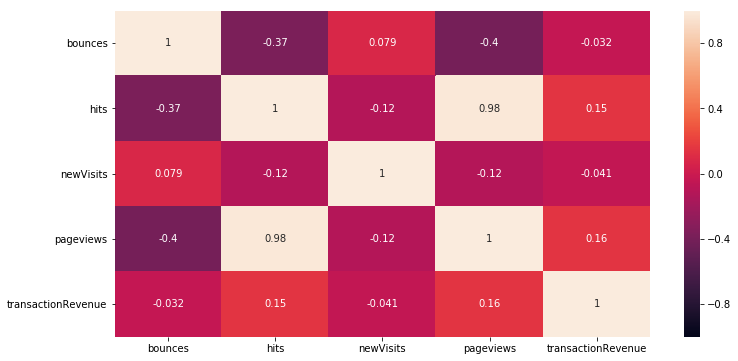

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(totals.corr(), vmin=-1, vmax=1, annot=True)

>From the correlation heatmap, we see that transactionRevenue has a strong correlation with hits and pageviews, howerver, pageviews has a much stronger correlation with hits.

**A simple Linear Regression model**

In [112]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.025320631161857787, 0.027986778883331453)

Based on the perfomance of our model, we see that while there is underfitting going on, but not too much, however, our score shows that we have quite a bit of room to improve on. 

Performing a quick RMSE metric, will show us how well our model is doing. 

In [114]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lr.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, lr.predict(X_test)) ** 0.5)  

52.933224339226555
49.474343978373


**This large value so far away from zero shows that our model has a long way to improve on.**

Now we add our totals back to our data frame.

In [18]:
# The new totals data frame is being appended to the main data frame after EDA while the old json totals column is dropped.
df = pd.concat([df, totals], axis=1).drop('totals', axis=1)

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,1,1,0.0
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,1,1,0.0
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,1,1,0.0
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,1,1,0.0
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,0,1,0.0


After extensive EDA on all columns in the main data frame was saved as a csv file and then used in another notebook for modeling. 

In [45]:
# Reading in the new data frame.
df = pd.read_csv("../capstone_data/kaggle_data/df_combined_tables.csv")

In [46]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,...,campaign,isTrueDirect,keyword,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,1970-01-01 00:00:00.020160902,1.131660e+18,1.131660e+28,1472830385,1,1472830385,Chrome,desktop,Windows,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
1,Organic Search,1970-01-01 00:00:00.020160902,3.773060e+17,3.773060e+27,1472880147,1,1472880147,Firefox,desktop,Macintosh,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
2,Organic Search,1970-01-01 00:00:00.020160902,3.895546e+18,3.895546e+28,1472865386,1,1472865386,Chrome,desktop,Windows,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
3,Organic Search,1970-01-01 00:00:00.020160902,4.763447e+18,4.763447e+28,1472881213,1,1472881213,UC Browser,desktop,Linux,...,(not set),-999,google + online,-999,google,1,1,1,1,0.0
4,Organic Search,1970-01-01 00:00:00.020160902,2.729444e+16,2.729444e+26,1472822600,2,1472822600,Chrome,mobile,Android,...,(not set),True,(not provided),-999,google,1,1,0,1,0.0


At this point all json columns have been converted to a data frame and each data frame has been added to the original one while replacing the json columns. Also all `nan's` have been filled with either `-999` for categorical values and 0 for numerical values. 

### Modeling with Numerical Values

We obtaining the numerical values from our newly defined values, draw some correlation on them then model. We also test to see our model is doing using the `Root Mean Square Error` metric.

In [47]:
X_numeric = df._get_numeric_data()

In [48]:
y = X_numeric['transactionRevenue']
X = X_numeric.drop(['transactionRevenue'], axis=1)

In [49]:
y_correlated = X.corrwith(y).sort_values(ascending = False)
y_correlated

pageviews         0.155589
hits              0.154333
visitNumber       0.051366
visitStartTime    0.002724
visitId           0.002724
fullVisitorId    -0.000061
sessionId        -0.000061
bounces          -0.032206
newVisits        -0.041164
dtype: float64

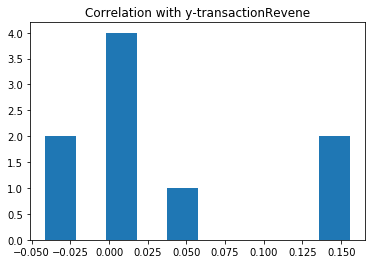

In [50]:
plt.hist(y_correlated)
plt.title('Correlation with y-transactionRevene');

> The above correlation shows that pageviews and hits are still our two strongest correlated columns with our y-variable

Train_test_split was performed and a Linear Regression model was performed on the the numeric data. This also did not do so well. To ensure that our data was equally scaled, a `Standard Scalar` scaling was applied.

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.027090901576080295, 0.029189809594483695)

##### Using Ridge and lasso regressing

Using RidgeCV (CV for cross-validation) regression seem to perform a bit worse than our Linear Regression Model, so we try LassoCV.

In [19]:
rcv = RidgeCV(alphas=np.logspace(0, 5,100), cv = 3)

rcv.fit(X_train, y_train)

rcv.score(X_train, y_train), rcv.score(X_test, y_test)

(0.02679019121269599, 0.028680174548972093)

LassoCv seem to perform about the same with our Linear Regression Model. All three Models still showing a bit of bias, hence underfitting.

In [20]:
lcv = LassoCV(cv=3)

lcv.fit(X_train, y_train)

lcv.score(X_train, y_train), lcv.score(X_test, y_test)

(0.027089164390251996, 0.029184380531635412)

In [21]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lcv.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, lcv.predict(X_test)) ** 0.5)  

52.885179478075145
49.44385631818874


Although our model slightly improved, it wasn't by much. It is still showing some bias so we will make our model a bit more complex by adding the categorical features. Beause the values of these features are not numbers we have to find a way to quantify them in such a way that the machine can read them. The `get_dummies()` method will be appled to transform them into `1's and 0's`. This however will increase our columns by how so many unique values we have in our categorical features making our data set much larger and computationally difficult. As a result, some more EDA is performed to closely look at our data and see which columns can be further dropped. 

Once all the necessary columns were dropped  we were left with 16 columns of which 6 were categorical.
These were further transformed into dummies creating 496 new columns. A combined total of `506 columns` and `903653 rows`. This indeed is a large data set to compute on a regular machine. **Time permitting, I may try creating models on AWS and on scala using spark.**

This new data set is saved as a new `csv` file and used in other notebooks for modeling.

Again we perform a Linear Regression, RidgeCV and LassoCv on our combined data set and check how well we are doing with the `RMSE` metric. Our results is as follows:

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.02798355943529396, -1.1352755306492406e+26)

In [36]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lr.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, lr.predict(X_test)) ** 0.5)  

52.86086526730443
534680809415504.75


Linear Regression performs much worse here with a great deal overfitting and our metric does prove its awful performance. 

##### Using Ridge and lasso regressing

In [1]:
# rcv = RidgeCV(alphas=np.logspace(0, 5,100), cv = 3)

# rcv.fit(X_train, y_train)

# rcv.score(X_train, y_train), rcv.score(X_test, y_test)

In [ ]:
# print(mean_squared_error(y_train, rcv.predict(X_train)) ** 0.5)
# print (mean_squared_error(y_test, rcv.predict(X_test)) ** 0.5) 

Using RidgeCV was a bit computationally intense and kept crashing the computer, hence we did not get any output. However, LassoCV seem to score about the same as with using only the numerical values.

In [30]:
lcv = LassoCV(cv=3)

lcv.fit(X_train, y_train)

lcv.score(X_train, y_train), lcv.score(X_test, y_test)

(0.028095641353674154, 0.029466466384250323)

In [35]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lcv.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, lcv.predict(X_test)) ** 0.5)  

52.85781752153458
49.43667244856717


Our metric without surprise is still about the same as just modeling with the totals data set. However, by taking the coefficients from our Lasso model, we get to see which feature zeros out (having less of an impact on our model) and which ones tend not to converge at zero (have more impact).

In [31]:
variables = X_df.columns
coef_values = lcv.coef_

variables_dictionary = {
    'variables': variables,
    'coefficient': coef_values
}

In [34]:
pd.DataFrame(variables_dictionary).set_index('variables').sort_values('coefficient', ascending=False).head(5)

,coefficient
variables,
pageviews,7.297421
visitNumber,2.244989
bounces,1.914733
hits,1.501596
source_dfa,0.920334


Listed above are the top impactful variables.

### Model Comparison

We draw a comparison between seven different models to see which works best on our data set.

In [18]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

list_of_models = [lr, dtr, etr, rfr, abr, gbr, svr]

In [ ]:
for each in list_of_models:
    print(str(each).split('(')[0])
    each.fit(X_train, y_train)
    print('Training score:')
    print(each.score(X_train, y_train))
    print('Testing score:')
    print(each.score(X_test, y_test))
    print()

LinearRegression
Training score:
1.0
Testing score:
-220.0415012211023

DecisionTreeRegressor
Training score:
0.9999999999991275
Testing score:
0.9503931282614783

ExtraTreesRegressor
Training score:
0.9999999999978048
Testing score:
0.9971348747207184

RandomForestRegressor
Training score:
0.9939324219021701
Testing score:
0.9920143239075393

AdaBoostRegressor
Training score:
0.9631905882191997
Testing score:
0.9614398870356407

GradientBoostingRegressor
Training score:
0.9999393721053543
Testing score:
0.9903982779576365

SVR


Our findings reveal, Linear Regrssion to be grossly overfitting. The other models show some overfitting but not by much. ExtraTressRegressor seem to have the best score and least overfitting going on with regards to the other CARTs.

In [13]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [14]:
gbr.score(X_train, y_train), gbr.score(X_test, y_test)

(0.9999393721053543, 0.9918393009835544)

Taking the RMSE metric of the gradiant boosting regressor shows a much better performance than what we got for Linear Regression.

In [17]:
print(mean_squared_error(y_train, gbr.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, gbr.predict(X_test)) ** 0.5)  

0.4174781074857505
4.5332287915270895


### Summary

- We began with trying to predict the how much customers will spend at a gStore.
- we analyze our data, performed some EDA and dropped the necessary columns.
- We then tried predicting on just on numerical columns and found that to be adequately lacking.
- Intend we tried predicting on all remaining columns both numerical and categorical coloumns and found that our model performed much better. Although we are scoring at 99% on some of our models, we realize that there is still room for improvement on our model.


### Suggested Improvements

- Since there is overfitting occuring, we might try to reduce the variance by making our model less complex.
- We might consider using only the top five impactful variables especially outlined by our LassoCV coeffients.